In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

csv = np.genfromtxt('uranium_test_2019-02-19_D3S.csv', delimiter= ",").T

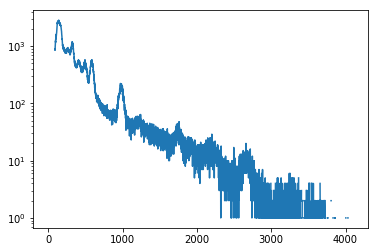

In [19]:
summed = np.sum(csv, axis=1)
plt.plot(summed)
plt.yscale('log')
plt.show()

In [72]:
def reset(r1, r2, c, l1, l2):
    r1, r2, c, l1, l2 = float('-inf'), float('-inf'), float('-inf'), float('-inf'), float('-inf')

def checkShape(i, data, r=5):
    sweep = [data[i + dx] for dx in range(-r, r+1)]
    prev=sweep[r]
    for k in range(1, r+1):
        if sweep[r-k] > prev:
            return False
        prev = sweep[r-k]
    prev=sweep[r]
    for k in range(1, r+1):
        if sweep[r+k] < prev:
            return False
        prev = sweep[r+k]
    return True
def sweepRight(data):
    bubbles = []
    l2 = float('-inf')
    l1 = float('-inf')
    c = float('-inf')
    r1 = float('-inf')
    r2 = float('-inf')
    for i in range(4, len(data)):
        r2=data[i]
        r1=data[i-1]
        c=data[i-2]
        l1=data[i-3]
        l2=data[i-4]
        if l2 < l1 and l1 < c and c > r1 and r1 > r2:
            bubbles.append(i-2)
            reset(r1, r2, c, l1, l2)
    return bubbles
def sweepLeft(data, r=2):
    bubbles = []
    index = r
    while index < len(data) - r:
        if checkShape(index, data, r):
            bubbles.append(index)
            index = index + r
        else:
            index += 1
    return bubbles
    
rdots = sweepRight(summed)
ldots = sweepLeft(summed, 3)
print(ldots)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 111, 114, 117, 3053, 3061, 3064, 3235, 3333, 3399, 3411, 3423, 3499, 3531, 3620, 3623, 3719, 3751, 3760, 3773, 3794, 3797, 3816, 3819, 3829, 3837, 3840, 3843, 3846, 3853, 3864, 3867, 3870, 3893, 3896, 3926, 3929, 3932, 3935, 3943, 3946, 3953, 3956, 3964, 3972, 3975, 3983, 3992, 3995, 3998, 4001, 4008, 4011, 4014, 4017, 4020, 4027, 4030, 4056, 4059, 4062, 4077]


[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 96, 110, 112, 114, 116, 118, 120, 312, 319, 481, 492, 581, 634, 730, 896, 923, 959, 1083, 1109, 1175, 1228, 1328, 1420, 1567, 1631, 1784, 1807, 2156, 2185, 2248, 2369, 2433, 2582, 2653, 2705, 2820, 2881, 2902, 2947, 3002, 3014, 3052, 3054, 3060, 3062, 3064, 3136, 3158, 3176, 3228, 3234, 3236, 3332, 3334, 3340, 3348, 3373, 3383, 3398, 3400, 3405, 3410, 3412, 3422, 3424, 3431, 3453, 3463, 3475, 3483, 3498, 3500, 3515, 3523, 3530, 3532, 3534, 3542, 3574, 3589, 3597, 3613, 3619, 3621, 3623, 3629, 3650, 3702, 3712, 3718, 3720, 3731, 3741, 3750, 3752, 3754, 3759, 3761, 3766, 3772, 3774, 3783, 3788, 3793, 3795, 3797, 3803, 3815, 3817, 3819, 3828, 3830, 3836, 3838, 3840, 3842, 3844, 3846, 3852, 3854, 3863, 3865, 3867, 3869, 3871, 3876, 3886, 3892, 3894, 3896, 3902, 3919, 3925, 3927, 3929, 3931, 3933, 3935, 3937, 3942, 3944, 394

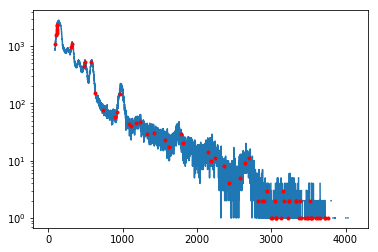

In [79]:
ldots = sweepLeft(summed,2)
print(ldots)
plt.plot(summed)
#plt.plot(rdots, summed[rdots], 'r.')
plt.plot(ldots, summed[ldots], 'r.')
plt.yscale('log')
plt.show()

In [34]:
print(len(rdots), len(ldots), len(inter))


1302 1276 1060
